In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import math


## Data Cleaning

In [2]:
# read data
data = pd.read_csv(r"D:\Projects Data Analysis\Smartwatch Data Analysis using Python\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")

data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
data.shape

(940, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
# check missing values
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [6]:
# Changing datatype of ActivityDate
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'], format='%m/%d/%Y')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [7]:
# (very active, fairly active, lightly active, and sedentary minutes) combine all these columns as total minutes 
data["TotalMinutes"] = data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"] + data["SedentaryMinutes"]

data["TotalMinutes"].sample(5)

109    1329
139    1262
470     907
699     937
610    1440
Name: TotalMinutes, dtype: int64

In [8]:
# find the weekdays of the records 
data['DayOfWeek'] = data['ActivityDate'].dt.day_name()

data['DayOfWeek'].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfWeek, dtype: object

In [9]:
# check duplicates
data.duplicated().sum()

0

In [10]:
data.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767


In [23]:
data.to_csv("data_cleaned.csv", index=False)

## EDA

## what is the relationship between calories burned and the total steps walked in a day?

In [12]:
figure = px.scatter(data_frame = data, x="Calories",
                    y="TotalSteps", size="VeryActiveMinutes",
                    trendline="ols", 
                    title="Relationship between Calories & Total Steps",  color_discrete_sequence=["#036666"])
figure.show()

we can see that the relationship between the total number of steps and the number of calories burned in a day is a **linear relationship**

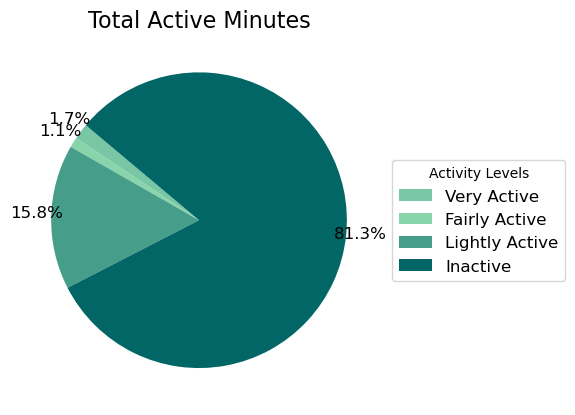

In [13]:
#  Average Contribution to Total Active Minutes

# Calculate the average active minutes for each activity level
avg_very_active = data['VeryActiveMinutes'].mean()
avg_fairly_active = data['FairlyActiveMinutes'].mean()
avg_lightly_active = data['LightlyActiveMinutes'].mean()
avg_Sedentary_active = data['SedentaryMinutes'].mean()

# Data for the pie chart
labels = ['Very Active', 'Fairly Active', 'Lightly Active', 'Inactive']
sizes = [avg_very_active, avg_fairly_active, avg_lightly_active, avg_Sedentary_active]
colors = ['#78c6a3','#88d4ab', "#469d89", "#036666"]

# Create the pie chart
wedges, texts = plt.pie(sizes, colors=colors, startangle=140)

# Add percentages as annotations outside the pie chart
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = 1.1 * math.cos(math.radians(angle))  
    y = 1.1 * math.sin(math.radians(angle))
    plt.text(x, y, f'{sizes[i] / sum(sizes) * 100:.1f}%', fontsize=12, ha='center')

# Add a legend
plt.legend(wedges, labels, title="Activity Levels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Add a title
plt.title('Total Active Minutes', fontsize=16)
plt.show()

## How do the very active, fairly active, and lightly active minutes vary across each day of the week?

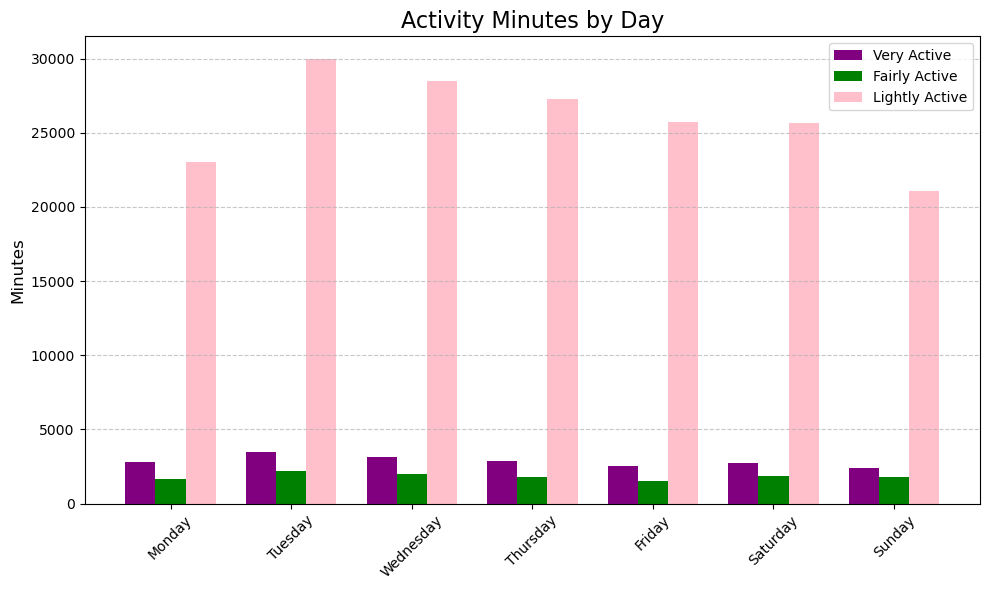

In [14]:
# Aggregate data by day of the week
days = data['DayOfWeek'].unique()
very_active = data.groupby('DayOfWeek')['VeryActiveMinutes'].sum()
fairly_active = data.groupby('DayOfWeek')['FairlyActiveMinutes'].sum()
lightly_active = data.groupby('DayOfWeek')['LightlyActiveMinutes'].sum()

# Sort days in standard week order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
very_active = very_active.reindex(day_order)
fairly_active = fairly_active.reindex(day_order)
lightly_active = lightly_active.reindex(day_order)

# Define positions for bars
x = np.arange(len(day_order))  # Numeric positions for each day
width = 0.25  # Width of each bar

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot the bars
plt.bar(x - width, very_active, width, label='Very Active', color='purple')
plt.bar(x, fairly_active, width, label='Fairly Active', color='green')
plt.bar(x + width, lightly_active, width, label='Lightly Active', color='pink')


plt.xticks(x, day_order, rotation=45, fontsize=10) 
plt.ylabel('Minutes', fontsize=12)
plt.title('Activity Minutes by Day', fontsize=16)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()


## How do the inactive minutes compare across different days of the week?

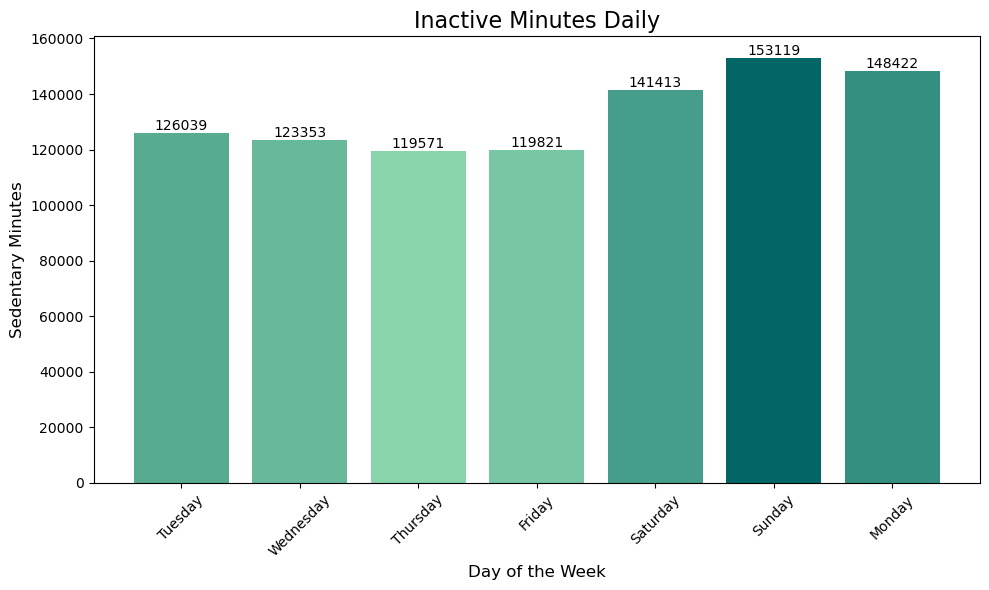

In [15]:
# Calculate total sedentary minutes by day
day_counts = data['DayOfWeek'].value_counts().sort_values(ascending=False)
label = day_counts.index
counts = data.groupby('DayOfWeek')['SedentaryMinutes'].sum()

colors = ['#56ab91', '#67b99a', '#88d4ab', '#78c6a3', '#469d89', '#036666', '#358f80']

# Create the column chart
plt.figure(figsize=(10, 6))
bars = plt.bar(label, counts, color=colors)

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, 
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Inactive Minutes Daily', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Sedentary Minutes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()


**Sunday** is the most inactive day according to the lifestyle of all the individuals in the dataset.

## What is number of calories burned on each day of the week?

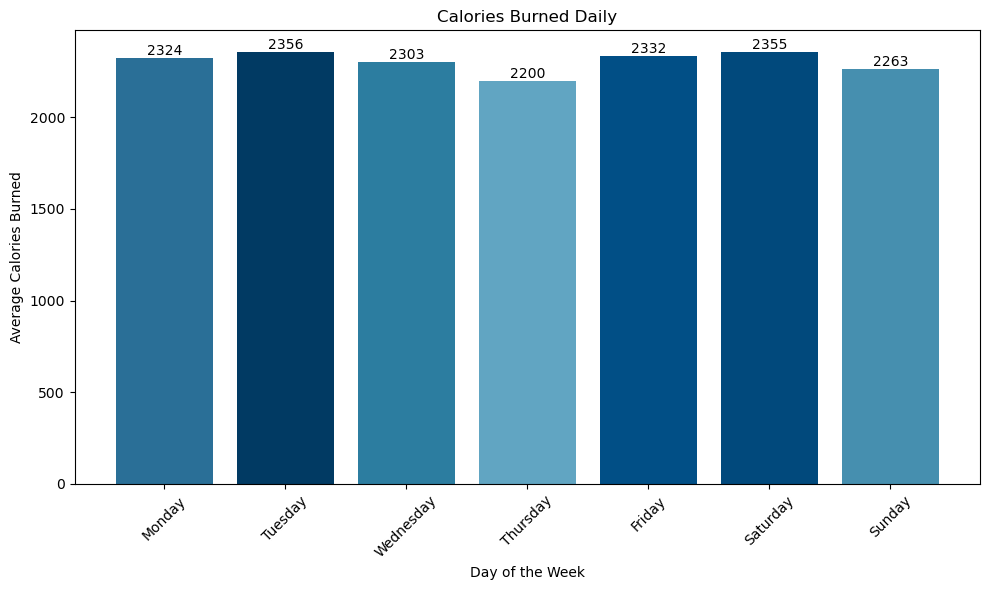

In [16]:
# Group data by day of the week
grouped_data = data.groupby('DayOfWeek').agg({
    'SedentaryMinutes': 'mean',
    'Calories': 'mean'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

colors = ["#2a6f97", "#013a63", "#2c7da0", "#61a5c2", "#014f86", "#01497c", "#468faf"]

# Calories burned chart
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data.index, grouped_data['Calories'], color=colors)

plt.title('Calories Burned Daily')
plt.ylabel('Average Calories Burned')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

 The highest number of calories were burned on **Tuesdays**